Abstract : HR Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

In [94]:
df = pd.read_csv('HR_Employee_Attrition.csv')

In [95]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [96]:
#Move attrition column to the end :
df = df[[c for c in df if c not in ['Attrition']] + ['Attrition']] 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [6]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [7]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
df['Over18'].value_counts()
#drop this column as it states that all employees are 18 years and above.

Y    1470
Name: Over18, dtype: int64

In [15]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Visualization

In [17]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


Text(0.5, 1.0, 'Age Distribution of Employees')

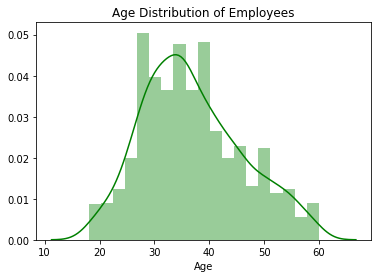

In [18]:
#Range of ages of employees in the organisation :
sns.distplot(df['Age'],color='green')
plt.title("Age Distribution of Employees")

    Most Employees age between 20 and 60 years old, with many employees being around 35 yrs of age.

Text(0.5, 1.0, 'Types of Employees on the move')

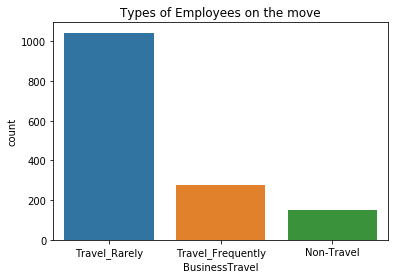

In [19]:
sns.countplot(df['BusinessTravel'])
plt.title("Types of Employees on the move")

    Very few people need to travel in this organisation.

Text(0.5, 1.0, 'Years In Current Role')

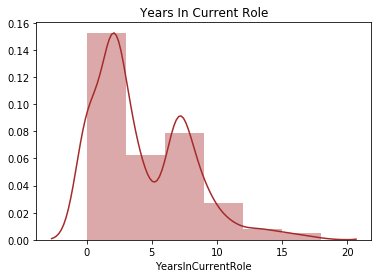

In [20]:
sns.distplot(df['YearsInCurrentRole'],bins=6,color='brown')
plt.title("Years In Current Role")


        Most people have 0-10 years of experience in the present role. 

Text(0.5, 1.0, 'Attrition based on age and department')

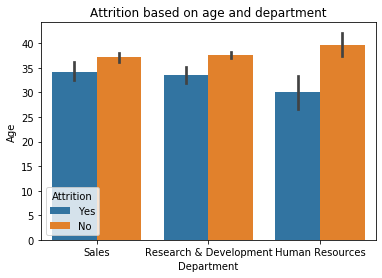

In [21]:
sns.barplot(x='Department',y='Age',data=df,hue='Attrition')
plt.title("Attrition based on age and department")

    Most people who have left organisation are from Sales department, followed RnD and then HR.

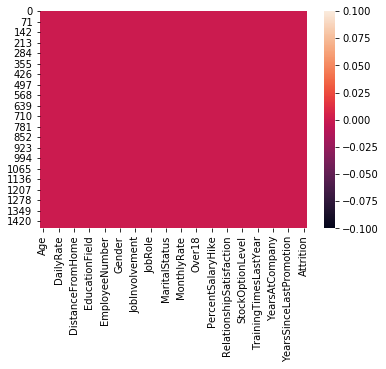

In [22]:
sns.heatmap(df.isnull())

     No null values are present.

Text(0.5, 1.0, 'Years of Experience vs Income')

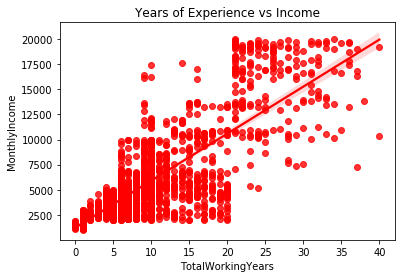

In [23]:
sns.regplot(x='TotalWorkingYears',y='MonthlyIncome',data=df,color='red')
plt.title("Years of Experience vs Income")

       Higher the experience, more the income. Most people have worked in this organisation betwwen 0-20 years.

# Data Manipulation

In [97]:
#Encode the columns
from sklearn.preprocessing import LabelEncoder

cols = ['Attrition','Gender','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']
for each in cols:
    encoder = LabelEncoder()
    df[each] = encoder.fit_transform(df[each])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int32 
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   int32 
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   int32 
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   int32 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [25]:
#drop unrelated columns
df.drop('Over18',axis=1,inplace=True)
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)

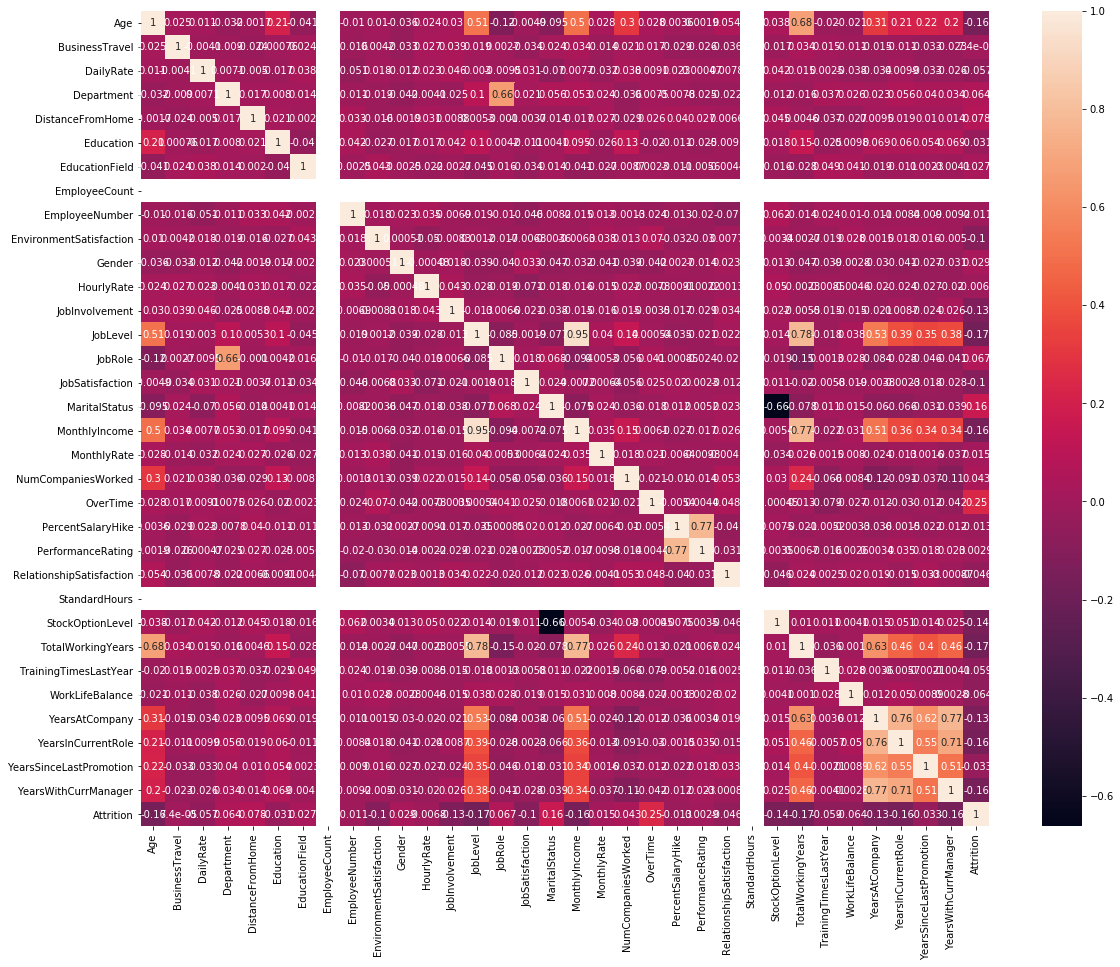

In [98]:
#Find correlation between variables
corr = df.corr()
plt.figure(figsize=(19,15))
sns.heatmap(corr,annot=True)

In [27]:
#Drop the following columns as they dont make much impact to target variable.
df.drop('DailyRate',axis=1,inplace=True)
df.drop('HourlyRate',axis=1,inplace=True)
X.drop('PercentSalaryHike',axis=1,inplace=True)

In [69]:
df.columns


Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [99]:
#keep the columns which are positively coorelated :
df =df[['Age','JobLevel','MonthlyIncome','TotalWorkingYears','OverTime','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]
df

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,OverTime,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,5993,8,1,6,4,0,5,1
1,49,2,5130,10,0,10,7,1,7,0
2,37,1,2090,7,1,0,0,0,0,1
3,33,1,2909,8,1,8,7,3,0,0
4,27,1,3468,6,0,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,17,0,5,2,0,3,0
1466,39,3,9991,9,0,7,7,1,7,0
1467,27,2,6142,6,1,6,2,0,3,0
1468,49,2,5390,17,0,9,6,0,8,0


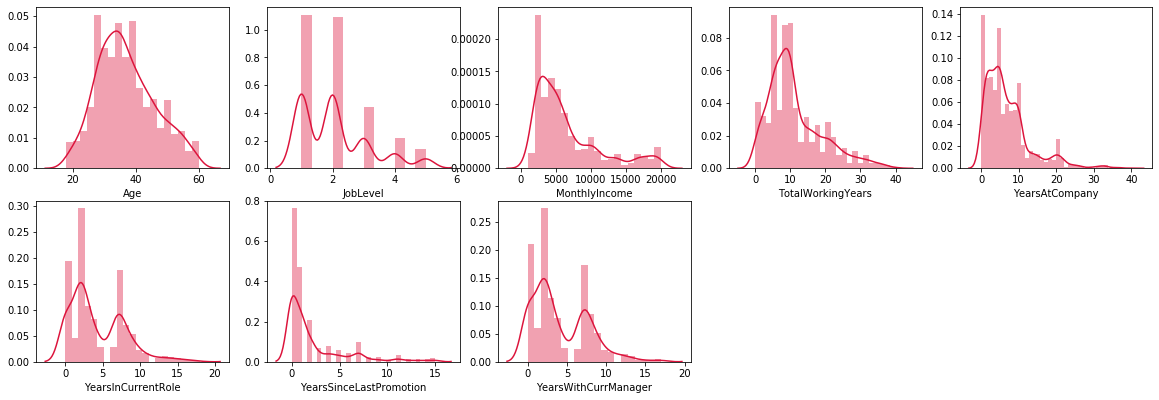

In [71]:
#Check for skewness
col = df.columns.values
plt.figure(figsize=(20,35))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col[i]],color='crimson')
plt.show()

    Data is not uniformly distributed and has right skewness in most of the columns

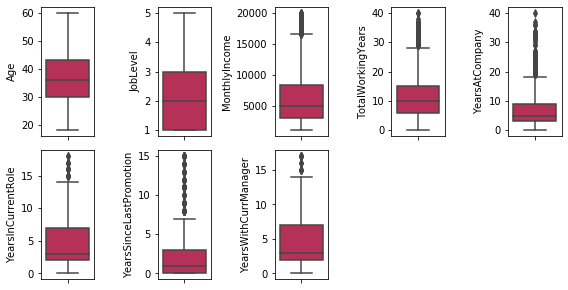

In [72]:
#Check for outliers :
plt.figure(figsize=(8,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

    Outliers are represented by dots and are present in few columns.

In [100]:
#Use z-score to find outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([8, 7, 5, 7, 6, 7, 3, 3, 5, 7, 6, 7, 8, 3, 5, 7, 8, 7, 3, 8, 5, 6,
       7, 6, 8, 5, 7, 3, 5, 6, 7, 7, 8, 3, 5, 5, 7, 7, 3, 6, 5, 5, 7, 5,
       8, 7, 5, 3, 5, 7, 8, 3, 8, 5, 7, 5, 8, 7, 6, 6, 5, 7, 7, 7, 5, 7,
       7, 8, 3, 5, 7, 5, 7, 7

In [101]:
#remove the outliers.
df_new = df[(z<3).all(axis=1)]

In [102]:
print(df.shape,"\t",df_new.shape)

(1470, 10) 	 (1387, 10)


In [103]:
#Feature Selection :

from sklearn.model_selection import train_test_split

X = df_new.drop('Attrition',axis=1)
y = df_new.iloc[:,-1:]

In [104]:
#Check skewness value.
X.skew()

Age                        0.472280
JobLevel                   1.126075
MonthlyIncome              1.544770
TotalWorkingYears          1.034487
OverTime                   0.954751
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

In [105]:
#Use PowerTransformer to remove skewness.
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
X = pd.DataFrame(pt.fit_transform(X))

X.skew()

0   -0.004079
1    0.110769
2    0.027700
3   -0.009666
4    0.954751
5   -0.025230
6   -0.069631
7    0.212301
8   -0.070570
dtype: float64

In [36]:
X[18].value_counts()

0.0    1387
Name: 18, dtype: int64

In [38]:
X.shape


(1387, 27)

In [80]:
y.shape
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Model Prediction and Validation

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.naive_bayes import GaussianNB as GN


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [107]:
model = [GN(),LR(),DTR(),KNR(),SVR(),Lasso(),Ridge(),ElasticNet(),LogReg()]

for i in range(len(model)):
    #randomState = random_state_counter(model[i])
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=40)
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    r2Score = r2_score(y_test,y_pred)
    
    print("*************************************************************************************")
    print(model[i])
    print("R2 Score : ",r2Score)
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
    print("")
    print("*************************************************************************************")


*************************************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)
R2 Score :  -0.3602446483180428
Mean Absolute Error :  0.2302158273381295
Mean Squared Error :  0.2302158273381295
Root Mean Squared Error :  0.4798081151232537

*************************************************************************************
*************************************************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score :  0.1755584399531862
Mean Absolute Error :  0.2658290219479275
Mean Squared Error :  0.13953335238098863
Root Mean Squared Error :  0.37354163406638974

*************************************************************************************
*************************************************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_

     LinearRegression performed better than the other models. 

In [42]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(LR(),X,y,cv=4,scoring='r2')
print("*************************************************************************************")
print("Score for ",LR()," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  : 
Score :  [0.22420343 0.23755466 0.18820284 0.15816832]
Mean :  0.2020323117568169
Standard Deviation :  0.031099436060895137
*************************************************************************************



In [43]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

gridsearch = GridSearchCV(LR(),parameters,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,y)
gridsearch.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [44]:
lr = LR(copy_X=True,fit_intercept=True,normalize=False)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = 167 )
lr.fit(x_train,y_train)
score = lr.score(x_train,y_train)
print("Score for Linear regression : ",score)
y_pred = lr.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print("R2 Score for Linear Regression : ",r2Score)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))



Score for Linear regression :  0.2391181336140773
R2 Score for Linear Regression :  0.24113154478538945
Mean Squared Error :  0.12207251999415195
Mean Absolute Error :  0.2615244696825808
Root Mean Squared Error :  0.3493887805785297


In [45]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lr,X,y,cv=4,scoring='r2')
print("*************************************************************************************")
print("Score for ",lr," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  : 
Score :  [0.22420343 0.23755466 0.18820284 0.15816832]
Mean :  0.2020323117568169
Standard Deviation :  0.031099436060895137
*************************************************************************************



In [46]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,500):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state

In [47]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR


In [48]:
ada = ABR(n_estimators=20,random_state=200)
gradient = GBR(n_estimators=20,random_state=62)
rfr = RFR(n_estimators=20,random_state=72)

boosting_model = [ada,gradient,rfr]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2Score = r2_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2Score)
    print("\n")

-----------------------------------------------------------
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=20, random_state=200)
-----------------------------------------------------------
R2 Score :  0.13214176034530667


-----------------------------------------------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=62, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=Fals

     Even after boosting, LinearRegressor's scores are better than the rest and hence that will be our final model.

In [49]:
from sklearn.externals import joblib

joblib.dump(lr,'linearRegressionModel.obj')

linearReg_from_joblib = joblib.load('linearRegressionModel.obj')

final_output = linearReg_from_joblib.predict(x_test)

In [50]:
#save final output to a csv file :
pd.DataFrame(final_output).to_csv("HR_Output.csv")